In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as plt

## Measures of Risk and Reward

### Variance
 - The average of the square of the deviations from the mean
 
$${\sigma}^{2}_{R} = {\frac{1}{N}}{\sum\limits _{i=1} ^{N}}{\left({R}_{i} - \bar{R}\right)^{2}}$$

### Standard Deviation
 - Square root of the variance
 
$${\sigma}_{R} = \sqrt{{\frac{1}{N}}{\sum\limits _{i=1} ^{N}}{\left({R}_{i} - \bar{R}\right)^{2}}}$$

### Annualizing Volatility
$${\sigma}_{ann} = {\sigma}_{p}\sqrt{p}$$

### Excess Return
 - Excess return over the risk free rate

$$\text{Return on Risk Ratio} = \frac{Return}{Volatility}$$

$$\text{Sharpe Ratio (P)} = \frac{\text{Return - Risk free rate}}{Volatility}=\frac{{R}_{p} - {R}_{f}}{{\sigma}_{p}}$$

### Lab Session

In [2]:
file_path = r'C:\Users\ojell\Desktop\Oj\2_Coursera\InvMgmt_Edhec\data'
sample_prices = pd.read_csv(file_path + '\sample_prices.csv')
returns = (sample_prices / sample_prices.shift()) - 1 #sample_prices.pct_change()

# Returns of sample prices
df = pd.concat([sample_prices, returns], axis=1, ignore_index=True)
df = df.dropna()
df.columns = ['BLUE', 'ORANGE', 'BLUE_pct', 'ORANGE_pct']
df

,BLUE,ORANGE,BLUE_pct,ORANGE_pct
1,8.9055,11.0828,0.023621,0.039662
2,8.7113,10.7100,-0.021807,-0.033638
3,8.4346,11.5907,-0.031763,0.082232
4,8.7254,12.1070,0.034477,0.044544
5,9.0551,11.7876,0.037786,-0.026381
6,8.9514,11.2078,-0.011452,-0.049187
7,9.2439,12.5192,0.032676,0.117008
8,9.1276,13.3624,-0.012581,0.067353
9,9.3976,14.4080,0.029581,0.078249
10,9.4554,11.9837,0.006151,-0.168261


In [3]:
df.std()

BLUE          0.393640
ORANGE        1.022121
BLUE_pct      0.023977
ORANGE_pct    0.079601
dtype: float64

In [4]:
# Calculating the standard deviation

volatility = df[['BLUE_pct', 'ORANGE_pct']].std()
volatility

BLUE_pct      0.023977
ORANGE_pct    0.079601
dtype: float64

In [5]:
# Manual calculation of standard deviation

ret = df[['BLUE_pct', 'ORANGE_pct']]

deviations = ret - ret.mean()
square_deviations = np.power(deviations, 2)
sum_sqrdev = np.sum(square_deviations)

vol_calc = (sum_sqrdev / (ret.shape[0]-1)) ** 0.5
vol_calc


BLUE_pct      0.023977
ORANGE_pct    0.079601
dtype: float64

In [6]:
var_calc = (np.sum((ret - ret.mean()) ** 2)) / (ret.shape[0] - 1)

vol_calc = np.sqrt(var_calc)
vol_calc

BLUE_pct      0.023977
ORANGE_pct    0.079601
dtype: float64

In [7]:
# Annualized Volatility

ann_vol = vol_calc * np.sqrt(12)
ann_vol

BLUE_pct      0.083060
ORANGE_pct    0.275747
dtype: float64

In [25]:
"""
<= 0 --> NA or data is not available
Lo 30, Med 40, Hi 30 --> divide the stocks by market cap, lowest 30, middle 40 and highest 30, then equally weighted them
Lo 20, Qnt 2-4, Hi 20  --> quintiles: lowest 20, quintile 2 to 4, highest 20
Lo 10, Dec 2-9, Hi 10 --> deciles: lowest 10, decile 2-9, highest 10

"""

file_path = r'C:\Users\ojell\Desktop\Oj\2_Coursera\InvMgmt_Edhec\data'
portfolio = pd.read_csv(file_path + '\Portfolios_Formed_on_ME_monthly_EW.csv',
                        header=0, index_col=0, parse_dates=True)
port_ret = portfolio.copy()

port_ret.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [9]:
cols = ['Lo 10', 'Hi 10']

port_ret = port_ret[cols] / 100
port_ret.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [10]:
port_ret.columns = ['SmallCap', 'LargeCap']
port_ret.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

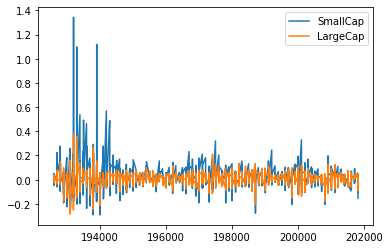

In [11]:
port_ret.plot.line()

In [12]:
"""
Calculate Excess Return
1. Calculate annualized return
   a. Calculate (r_daily_0 + 1) * (r_daily_nth + 1) --> compounding
   b. Calculate r_monthly = r compounding ^ (1/nth)
   c. Annualized return = r_monthly * sqrt(12)

2. Calculate excess return
   a. Excess Return = (r - rf) / vol

"""

'\nCalculate Excess Return\n1. Calculate annualized return\n   a. Calculate (r_daily_0 + 1) * (r_daily_nth + 1) --> compounding\n   b. Calculate r_monthly = r compounding ^ (1/nth)\n   c. Annualized return = r_monthly * sqrt(12)\n\n2. Calculate excess return\n   a. Excess Return = (r - rf) / vol\n\n'

In [13]:
# Calculate mean and stdv
port_mean = port_ret.mean()
port_std = port_ret.std()

print('Calculated Mean\n',port_mean, '\n\nCalculated Std Dev\n', port_std)

Calculated Mean
 SmallCap    0.017598
LargeCap    0.008870
dtype: float64 

Calculated Std Dev
 SmallCap    0.106288
LargeCap    0.053900
dtype: float64


In [14]:
# Calculate annualized volatility
port_ann = port_std * np.sqrt(12)
port_ann

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [15]:
# Calculate return per month

n_mnth = port_ret.shape[0]

port_ret_mnth = ((port_ret +  1).prod() ** (1/n_mnth)) - 1   # note that (port_ret + 1).prod() is compounding rate of return 
port_ret_mnth

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [16]:
ann_ret = ((port_ret_mnth + 1) ** 12) - 1
ann_ret

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [17]:
# Calculating Annualized Return in one step
ann_ret = (port_ret + 1).prod() ** (12/n_mnth) - 1
ann_ret

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [18]:
# Calculate Annualized Volatility
ann_vol = (port_ret.std()) * np.sqrt(12)  # note: lab session used np.sqrt(12), i corrected since std is calculated for 1100 data points
ann_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [19]:
ann_ret / ann_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [20]:
(ann_ret - 0.03) / ann_vol

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [21]:
"""
Calculate annualized return, volatility and excess returns on all categories
<= 0 --> NA or data is not available
Lo 30, Med 40, Hi 30 --> divide the stocks by market cap, lowest 30, middle 40 and highest 30, then equally weighted them
Lo 20, Qnt 2-4, Hi 20  --> quintiles: lowest 20, quintile 2 to 4, highest 20
Lo 10, Dec 2-9, Hi 10 --> deciles: lowest 10, decile 2-9, highest 10

"""

file_path = r'C:\Users\ojell\Desktop\Oj\2_Coursera\InvMgmt_Edhec\data'
portfolio_all = pd.read_csv(file_path + '\Portfolios_Formed_on_ME_monthly_EW.csv',
                        header=0, index_col=0, parse_dates=True)

portfolio_all = portfolio_all.drop(columns=['<= 0'])
portfolio_all.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [22]:
portfolio_all.columns = ['SmallCap', 'MediumCap', 'LargeCap',
                     'Qnt 1', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Qnt 5',
                     'Dec 1', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7', 'Dec 8', 'Dec 9', 'Dec 10']
port_ret_all = portfolio_all / 100
port_ret_all.head()

,SmallCap,MediumCap,LargeCap,Qnt 1,Qnt 2,Qnt 3,Qnt 4,Qnt 5,Dec 1,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Dec 10
192607,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
192608,0.0390,0.0304,0.0209,0.0384,0.0359,0.0371,0.0161,0.0233,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
192609,-0.0108,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
192610,-0.0332,-0.0352,-0.0306,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
192611,-0.0046,0.0382,0.0309,-0.0055,0.0218,0.0341,0.0339,0.0316,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


In [23]:
# Calculate Annualized Return, Annualized Volatility
n_mnth = port_ret_all.shape[0]

ann_ret_all = (port_ret_all + 1).prod() ** (12/n_mnth) - 1
ann_vol_all = port_ret_all.std() * np.sqrt(12)

print(ann_ret_all, '\n\n', ann_vol_all)

SmallCap     0.144204
MediumCap    0.114807
LargeCap     0.102293
Qnt 1        0.151977
Qnt 2        0.119742
Qnt 3        0.115613
Qnt 4        0.109488
Qnt 5        0.098490
Dec 1        0.167463
Dec 2        0.122493
Dec 3        0.121011
Dec 4        0.117643
Dec 5        0.112702
Dec 6        0.117929
Dec 7        0.109493
Dec 8        0.108793
Dec 9        0.103338
Dec 10       0.092810
dtype: float64 

 SmallCap     0.315962
MediumCap    0.244790
LargeCap     0.201462
Qnt 1        0.336701
Qnt 2        0.274667
Qnt 3        0.244160
Qnt 4        0.221486
Qnt 5        0.195116
Dec 1        0.368193
Dec 2        0.315841
Dec 3        0.283806
Dec 4        0.267540
Dec 5        0.249848
Dec 6        0.240157
Dec 7        0.228367
Dec 8        0.216948
Dec 9        0.206224
Dec 10       0.186716
dtype: float64


In [24]:
# Calculate excess return or sharpe ratio

rf = 0.03

sharpe = (ann_ret_all - rf) / ann_vol_all
sharpe

SmallCap     0.361450
MediumCap    0.346449
LargeCap     0.358843
Qnt 1        0.362271
Qnt 2        0.326730
Qnt 3        0.350643
Qnt 4        0.358883
Qnt 5        0.351023
Dec 1        0.373346
Dec 2        0.292848
Dec 3        0.320680
Dec 4        0.327587
Dec 5        0.331010
Dec 6        0.366129
Dec 7        0.348094
Dec 8        0.363190
Dec 9        0.355621
Dec 10       0.336392
dtype: float64